In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
df = pd.read_csv('threads.csv')

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df

,threads,energy,runtime,usertime,user-pct,energy-user,W
0,1,7.084987,0.058707,0.058714,1.000000,7.084987,120.684273
1,2,3.693301,0.029515,0.029332,0.993820,3.670476,125.134283
2,3,3.748931,0.029394,0.019466,0.662248,2.482723,127.539248
3,4,2.380247,0.014818,0.014635,0.987654,2.350861,160.637532
4,5,1.989240,0.011858,0.011684,0.985346,1.960089,167.761608
5,6,1.705405,0.011852,0.009750,0.822633,1.402922,143.888078
6,7,1.714705,0.009999,0.008386,0.838723,1.438162,171.493090
7,8,1.368819,0.007453,0.007342,0.985041,1.348342,183.650239
8,9,1.379060,0.007515,0.006548,0.871320,1.201602,183.497387
9,10,1.172569,0.006007,0.005889,0.980290,1.149457,195.189360


In [178]:
df_speedup = df.copy()

for col in df_speedup.columns[1:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup

,threads,energy,runtime,usertime,user-pct,energy-user,W
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.918335,1.989070,2.001679,1.006218,1.930264,0.964438
2,3,1.889869,1.997215,3.016173,1.510008,2.853717,0.946252
3,4,2.976577,3.961991,4.011997,1.012500,3.013784,0.751283
4,5,3.561655,4.951010,5.025246,1.014872,3.614625,0.719380
5,6,4.154432,4.953199,6.021877,1.215609,5.050165,0.838737
6,7,4.131900,5.871455,7.001309,1.192289,4.926417,0.703727
7,8,5.175987,7.876513,7.997089,1.015186,5.254592,0.657142
8,9,5.137549,7.811513,8.966227,1.147684,5.896283,0.657689
9,10,6.042278,9.772512,9.970198,1.020106,6.163767,0.618293


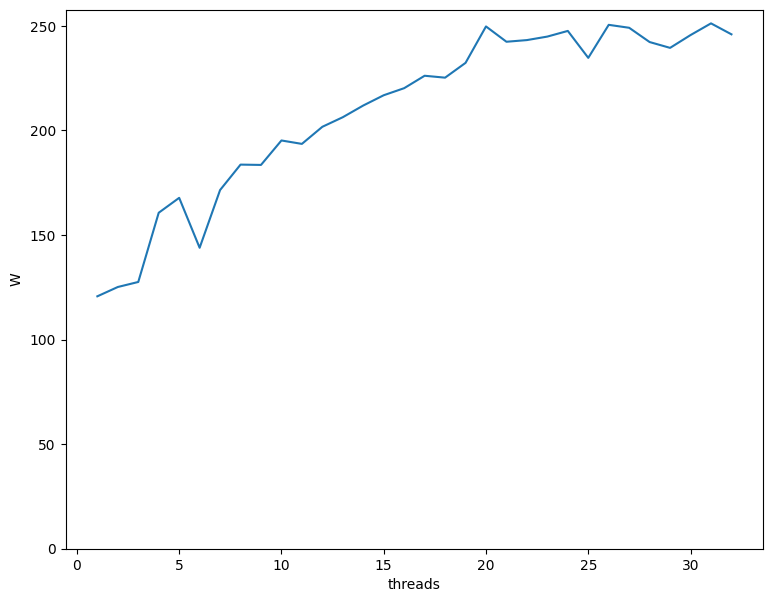

In [179]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

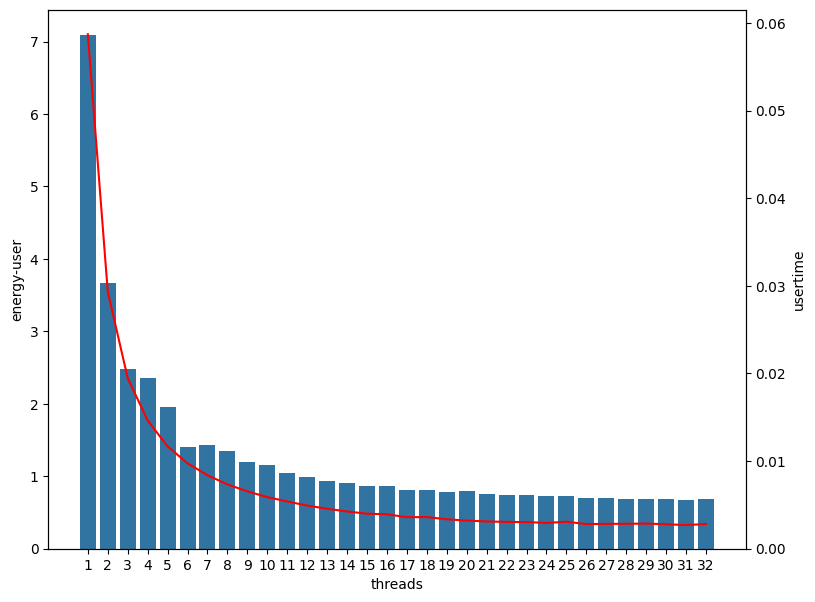

In [182]:
plt.figure(figsize=(9,7))

ax = sns.barplot(df, x='threads', y='energy-user')

ax2 = ax.twinx()

sns.lineplot(df, x=df.index, y='usertime', color='r', ax=ax2)

ax2.set_ylim((0, None))

plt.show()

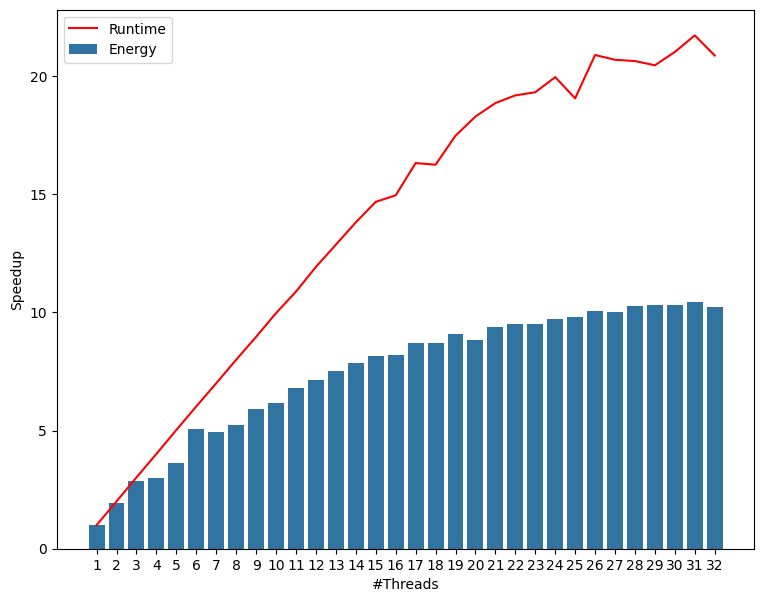

In [183]:
plt.figure(figsize=(9,7))

ax = sns.barplot(df_speedup, x='threads', y='energy-user', label='Energy')
sns.lineplot(df_speedup, x=df_speedup.index, y='usertime', label='Runtime', color='r', ax=ax)

ax.set_xlabel('#Threads')
ax.set_ylabel('Speedup')
ax.set_ylim((0, None))

plt.show()